# Exercício 4:

Considere agora uma função bidimensional:

 $$U(\vec{r}) = U(x, y) = \sin(x)\cos(y) + \frac{2(xy)^2}{1000}$$

A função tem multiplos mínimos locais. A vizualiação 3D dos passos neste caso pode ser dificil de interpretar. Então, neste caso, para acompanhar a evolução do algoritmo, faça dois gráficos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def funcao(x, y):
    return np.sin(x)*np.cos(y) + (2*(x*y)**2)/1000

# Para que não haja divergência da função, vamos multiplicar por um gaussiana para suavizar
def gaussiana(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    return np.exp(-((x - x0)**2 / (2*sigma_x**2) + -((y - y0)**2 / (2*sigma_y**2))))

def funcao_suavizada(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    return funcao(x, y) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)

def df_dx(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    gauss = gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    funcao_dx = np.cos(x)*np.cos(y) + (4*x*y**2)/1000
    deriv_gauss_dx = -(x - x0)/(sigma_x**2) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    return funcao_dx * gauss + funcao(x, y) * deriv_gauss_dx

def df_dy(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    gauss = gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    funcao_dy = -np.sin(x)*np.sin(y) + (4*x**2*y)/1000
    deriv_gauss_dy = -(y - y0)/(sigma_y**2) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    return funcao_dy * gauss + funcao(x, y) * deriv_gauss_dy

In [15]:
def grad_desc(x_0, y_0, alpha, itera, sigma_x=1.0, sigma_y=1.0, epsilon=0.01):
    x, y = x_0, y_0
    x_list = [x]
    y_list = [y]
    U = [funcao_suavizada(x, y, x_0, y_0, sigma_x, sigma_y)]

    for _ in range(itera):
        grad_x = df_dx(x, y, x_0, y_0, sigma_x, sigma_y)
        grad_y = df_dy(x, y, x_0, y_0, sigma_x, sigma_y)

        x_i = x_0 - alpha * grad_x
        y_i = y_0 - alpha * grad_y

        x_list.append(x_i)
        y_list.append(y_i)
        U.append(funcao_suavizada(x_i, y_i, x_0, y_0, sigma_x, sigma_y))

        delta = np.sqrt((x_i - x)**2 + (y_i - y)**2)
        
        if abs(delta) < epsilon:
            break

        x , y = x_i, y_i

    return x_list, y_list, U

In [14]:
x_0 = 2
y_0 = 3
alpha = 0.1
epsilon = 0.01
sigma_x, sigma_y = 2, 2

a. Um gráfico de contorno (use plt.imshow ou plt.pcolormesh) da função $U(x,y)$ e desenhe a trajetória da partícula no gráfico.

NameError: name 'x_list' is not defined

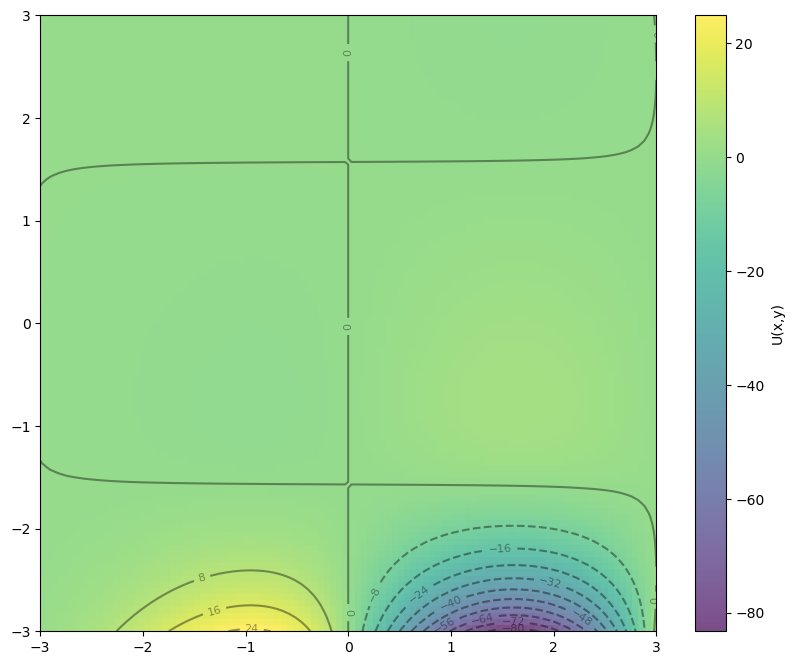

In [16]:
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcao_suavizada(X, Y, x_0, y_0, sigma_x, sigma_y)

plt.figure(figsize=(10, 8))
plt.imshow(Z, 
           extent=[-3, 3, -3, 3], 
           origin='lower', 
           cmap='viridis', 
           alpha=0.7)
plt.colorbar(label='U(x,y)')

# Contorno
contours = plt.contour(X, Y, Z, levels=15, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8)

# Trajetória da partícula
plt.plot(x_list, y_list, 'r-', linewidth=2, label='Trajetória')
plt.scatter(x_list, y_list, c='red', s=50, label='Posições')

plt.scatter(x_list[0], y_list[0], c='green', s=100, label='Início', marker='o')
plt.scatter(x_list[-1], y_list[-1], c='blue', s=100, label='Fim', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Otimização: Trajetória sobre U(x,y)')
plt.legend()
plt.grid(True)
plt.show()

b. Faça um gráfico do valor de $U(x_{n},r_{n})$ a cada passo como função das iterações (passos) $n$. No contexto de redes neurais chamaremos estes passos de epochs.

Varie a posição inicial $(x_{0},y_{0})$ e a taxa de aprendizado α e veja como isso afeta a convergência do algoritmo. O que acontece se você aumentar muito a taxa de aprendizado? E se você diminuir muito? Você consegue atingir o mínimo global?